# Multi-Class Classification Problem

In [7]:
import torch
from torch import nn
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Dataset Parameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [8]:
X_blob, y_blob = make_blobs(
    n_samples = 1000,
    n_features = NUM_FEATURES,
    centers = NUM_CLASSES,
    cluster_std = 1.5,
    random_state = RANDOM_SEED
)

In [9]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [10]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob,
    y_blob,
    random_state = RANDOM_SEED,
    test_size = 0.2
)

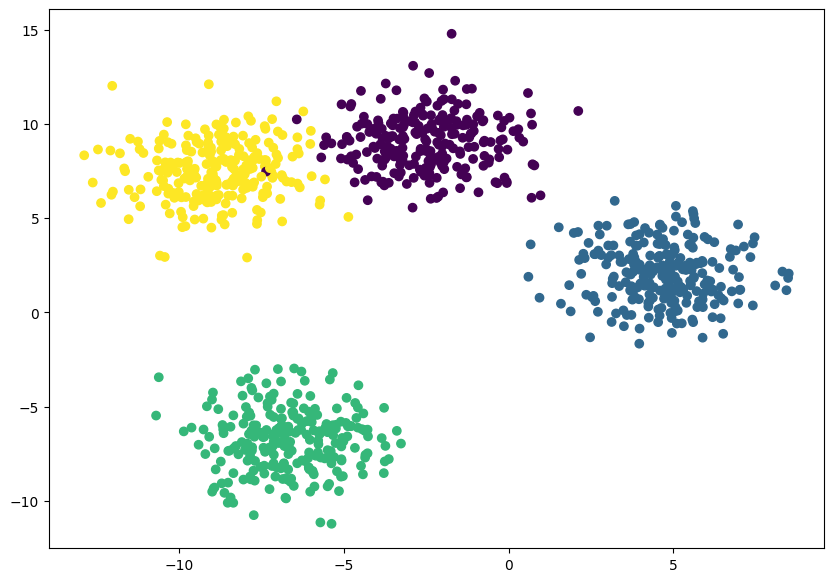

In [16]:
plt.figure(figsize = (10, 7))
plt.scatter(x = X_blob[:, 0], y = X_blob[:, 1], c = y_blob, cmap = 'viridis')
plt.show()

### Building a Multi-Class Classification Model

In [93]:
class BlobMultiClassifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
            )
    def forward(self, x):
        return self.linear_layer_stack(x)

In [94]:
model_4 = BlobMultiClassifier(
    input_features = 2, 
    output_features = 4, 
    hidden_units = 8
    ).to(device)
model_4

BlobMultiClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Loss Function and Optimizer

In [95]:
#Loss Function
loss_fn = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.SGD(
    params = model_4.parameters(),
    lr = 0.1
)

### Getting Preliminary Predictions
Logits (raw outputs) -> Prediction Probabilities (`torch.softmax()`) -> Predication Labels (`torch.argmax()`)

In [96]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='mps:0')

In [97]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.], device='mps:0')

In [98]:
#Convert logits to probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]], device='mps:0')

In [99]:
#Use argmax() to find the class with the highest prediction probability
y_pred_probs[0].argmax()

tensor(1, device='mps:0')

In [100]:
#Convert prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='mps:0')

### Training and Testing Loop

In [101]:
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

def train_test_loop(
        model: BlobMultiClassifier, 
        loss_function: torch.nn.Module, 
        optimization_function: torch.optim.Optimizer, 
        epochs: int,
        X_train: torch.Tensor,
        y_train: torch.Tensor,
        X_test: torch.Tensor,
        y_test: torch.Tensor
        ):
    torch.manual_seed(42)
    for epoch in range(epochs):
        ###Training
        model.train()
        #Forward Pass
        y_logits = model(X_train)
        y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
        #Loss and Accuracy
        loss = loss_fn(y_logits, y_train)
        accuracy = accuracy_fn(y_true = y_train, y_pred = y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ###Testing
        model.eval()
        with torch.inference_mode():
            y_test_logits = model(X_test)
            y_test_pred = torch.softmax(y_test_logits, dim = 1).argmax(dim = 1)
            test_loss = loss_fn(y_test_logits, y_test)
            test_accuracy = accuracy_fn(y_true = y_test, y_pred = y_test_pred)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Accuracy: {accuracy}, Loss: {loss} | Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

train_test_loop(model_4, loss_fn, optimizer, 151, X_blob_train, y_blob_train, X_blob_test, y_blob_test)

Epoch: 0 | Accuracy: 40.375, Loss: 1.1588265895843506 | Test Accuracy: 48.0, Test Loss: 1.0755419731140137
Epoch: 10 | Accuracy: 96.75, Loss: 0.6447554230690002 | Test Accuracy: 97.5, Test Loss: 0.660687267780304
Epoch: 20 | Accuracy: 98.5, Loss: 0.4253515601158142 | Test Accuracy: 100.0, Test Loss: 0.43074119091033936
Epoch: 30 | Accuracy: 99.125, Loss: 0.2529423236846924 | Test Accuracy: 99.5, Test Loss: 0.24507610499858856
Epoch: 40 | Accuracy: 99.25, Loss: 0.11232148110866547 | Test Accuracy: 99.5, Test Loss: 0.10228515416383743
Epoch: 50 | Accuracy: 99.25, Loss: 0.06626509130001068 | Test Accuracy: 99.5, Test Loss: 0.05847536399960518
Epoch: 60 | Accuracy: 99.25, Loss: 0.05068014934659004 | Test Accuracy: 99.5, Test Loss: 0.04293227195739746
Epoch: 70 | Accuracy: 99.25, Loss: 0.04299675300717354 | Test Accuracy: 99.5, Test Loss: 0.034909654408693314
Epoch: 80 | Accuracy: 99.25, Loss: 0.038361381739377975 | Test Accuracy: 99.5, Test Loss: 0.02987820655107498
Epoch: 90 | Accuracy: 9

In [102]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

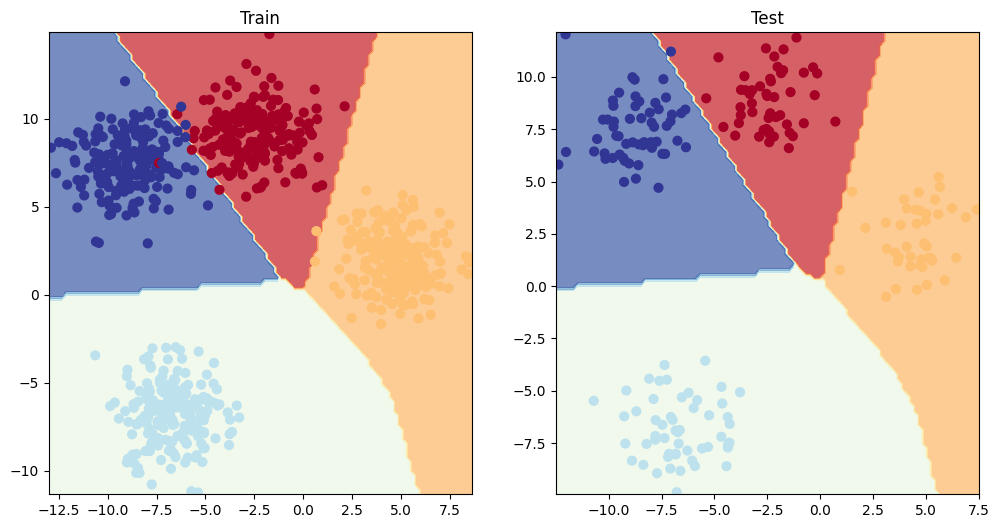

In [103]:
#Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### Classification Metrics
* Accuracy: how many correct out of 100
* Precision: 
* Recall: 
* F1-Score
* Confusion Matrix
* Classification Report

In [109]:
from sklearn.metrics import classification_report
model_4.to(device)
y_pred_probs = torch.softmax(model_4(X_blob_test), dim = 1)
y_pred = torch.argmax(y_pred_probs, dim = 1)

print(classification_report(y_true = y_blob_test.cpu(), y_pred = y_pred.cpu()))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        49
         1.0       1.00      1.00      1.00        41
         2.0       1.00      1.00      1.00        53
         3.0       1.00      0.98      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [112]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task = 'multiclass', num_classes = 4).to(device)
torchmetric_accuracy(y_pred, y_blob_test)

tensor(0.9950, device='mps:0')